<a href="https://colab.research.google.com/github/youngyoung0511/Sound-AI/blob/main/1111_Onset_Detection_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# setting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install PyWavelets librosa matplotlib numpy
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pywt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.7 MB/s eta 0:00:00


# onset detection - 타격 시점 감지

음악 파일 로드 및 .wav 변환

'/content/drive/My Drive/soundAI/BoysLikeGirls.mp3'

In [ ]:
audio_path = '/content/drive/My Drive/soundAI/MagicCarpetRide_drum.mp3'  # 여기에 mp3 파일 경로를 입력하세요
y, sr = librosa.load(audio_path, sr=None)


자동 온셋 디텍션 검출로 타격 시점 감지

타격 시점의 타임 스탬프를 기록

In [ ]:
# 온셋 디텍션
onset_frames = librosa.onset.onset_detect(y=y, sr=sr, backtrack=True)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# 타격 시점 출력
print("Detected Onset Times:", onset_times)


Detected Onset Times: [  0.31346939   0.54566893   1.01006803   1.25387755   1.45124717
   1.69505669   1.8924263    2.36843537   2.8676644    3.13469388
   3.34367347   3.79646259   4.05188209   4.23764172   4.51628118
   4.73687075   4.95746032   5.17804989   5.61922902   6.08362812
   6.57124717   6.79183673   7.0124263    7.45360544   7.70902494
   7.91800454   8.17342404   8.38240363   8.63782313   8.83519274
   9.31120181   9.77560091  10.25160998  10.47219955  10.70439909
  11.16879819  11.42421769  11.63319728  11.8770068   12.09759637
  12.31818594  12.53877551  12.81741497  12.99156463  13.47918367
  13.94358277  14.16417234  14.3847619   14.62857143  15.33678005
  15.58058957  15.66185941  15.78956916  15.99854875  16.2307483
  16.46294785  16.64870748  17.17115646  17.67038549  17.8677551
  18.09995465  18.35537415  18.56435374  18.76172336  19.00553288
  19.26095238  19.5047619   19.70213152  19.88789116  20.18975057
  20.42195011  20.66575964  20.8399093   21.13015873  21

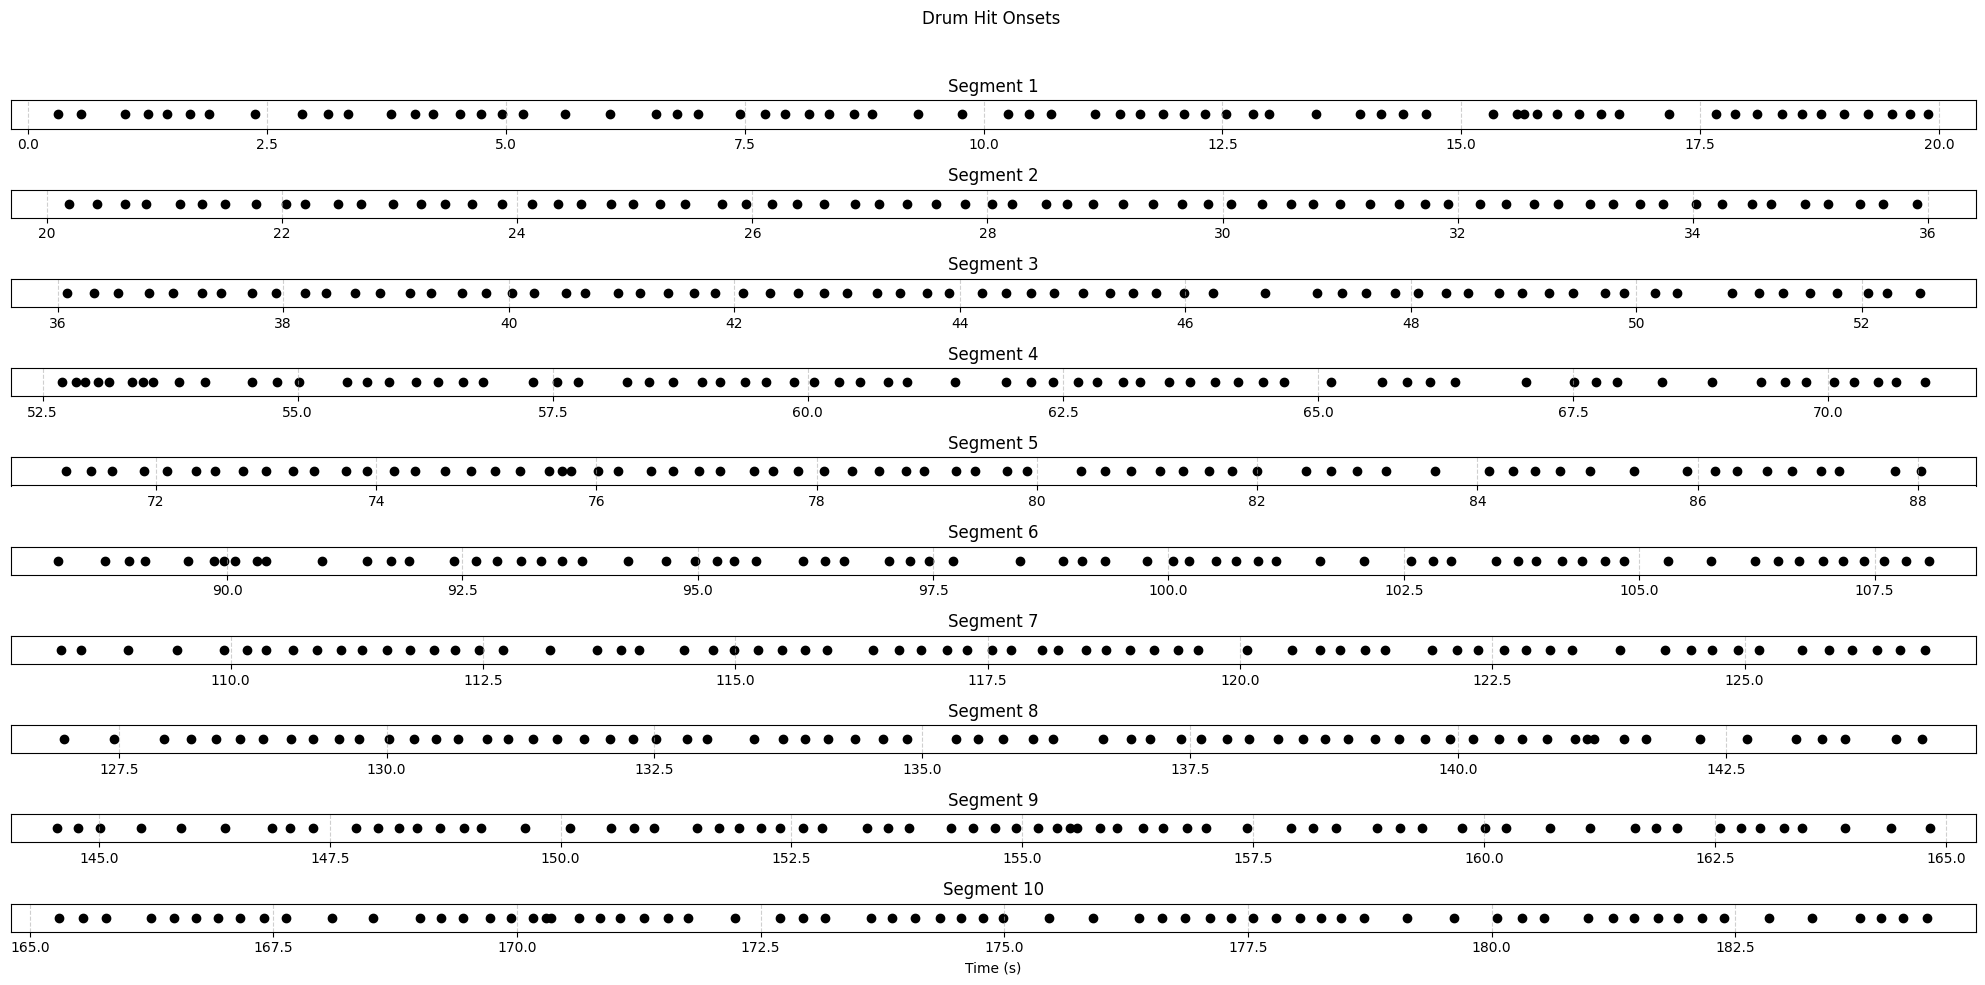

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# onset_times 리스트가 이미 있다고 가정
# 예시: onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# 온셋을 5등분으로 나누기 (각 줄이 적절한 길이를 가지도록 조정)
num_segments = 10
split_onsets = np.array_split(onset_times, num_segments)

# 그래프 그리기
fig, axes = plt.subplots(num_segments, 1, figsize=(20, 10), sharex=False)  # 5줄 subplot 생성
fig.suptitle("Drum Hit Onsets")

for i, ax in enumerate(axes):
    # 각 줄마다 x축 범위를 온셋의 최소-최대 값으로 설정해 점들이 겹치지 않게 함
    ax.scatter(split_onsets[i], np.ones(len(split_onsets[i])), color='black', marker='o')
    ax.set_xlim(min(split_onsets[i]) - 0.5, max(split_onsets[i]) + 0.5)  # 각 줄에 여유 공간 추가
    ax.set_yticks([])  # y축 제거
    ax.grid(True, axis='x', linestyle='--', alpha=0.6)  # x축에만 그리드 표시
    ax.set_title(f"Segment {i + 1}")  # 각 줄에 제목 추가

axes[-1].set_xlabel("Time (s)")  # 마지막 subplot에 x축 라벨 추가
plt.tight_layout(rect=[0, 0, 1, 0.96])  # 제목과 그래프 간격 조정
plt.show()
